In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import xgcm
import xrft

from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

from bbl_utils import *

import warnings
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

### Physical parameters

In [2]:
Γ = 0.0008613659531090722
θ = 2.e-3
f = 0.53e-4

### Load dataset

In [3]:
nIter = 25
step0 = 14400
nstep = step0*2

iters = range(step0,nIter*nstep+step0,nstep)
iters_mean = range(nstep, nIter*nstep, nstep)
print("Iters: ",list(iters_mean))

Iters:  [28800, 57600, 86400, 115200, 144000, 172800, 201600, 230400, 259200, 288000, 316800, 345600, 374400, 403200, 432000, 460800, 489600, 518400, 547200, 576000, 604800, 633600, 662400, 691200]


In [4]:
data_dir = "../../MITgcm/experiments/rotated_canyon/run/"
ds_snap = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["snapshotDiag"])
ds = open_mdsdataset(data_dir,iters=iters_mean,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])

### Pre-process dataset

In [5]:
ds, coords, grid = pre_process(ds, timestep=30.)
ds, coords = add_cartesian_coordinates(ds, coords, θ)
ds = add_background_temp(ds, Γ)
ds, coords = add_hab_coordinates(ds, coords)
ds = add_Nsq(ds, Γ)

ds_snap, coords_snap, gri_snapd = pre_process(ds_snap, timestep=30.)
ds_snap, coords_snap = add_cartesian_coordinates(ds_snap, coords_snap, θ)
ds_snap = add_background_temp(ds_snap, Γ)
ds_snap, coords_snap = add_hab_coordinates(ds_snap, coords_snap)

print(ds['time']/86400.)
ds

<xarray.DataArray 'time' (time: 24)>
array([ 10000000000,  20000000000,  30000000000,  40000000000,
        50000000000,  60000000000,  70000000000,  80000000000,
        90000000000, 100000000000, 110000000000, 120000000000,
       130000000000, 140000000000, 150000000000, 160000000000,
       170000000000, 180000000000, 190000000000, 200000000000,
       210000000000, 220000000000, 230000000000, 240000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 10 days 20 days ... 230 days 240 days


<xarray.Dataset>
Dimensions:   (XC: 256, XG: 256, YC: 256, YG: 256, Z: 280, Zl: 280, Zp1: 281, Zu: 280, time: 24)
Coordinates:
  * time      (time) timedelta64[ns] 10 days 20 days ... 230 days 240 days
  * XC        (XC) >f8 300.0 900.0 1.5e+03 ... 1.521e+05 1.527e+05 1.533e+05
  * YC        (YC) >f8 300.0 900.0 1.5e+03 ... 1.521e+05 1.527e+05 1.533e+05
  * XG        (XG) >f8 0.0 600.0 1.2e+03 ... 1.518e+05 1.524e+05 1.53e+05
  * YG        (YG) >f8 0.0 600.0 1.2e+03 ... 1.518e+05 1.524e+05 1.53e+05
  * Z         (Z) float64 2.626e+03 2.572e+03 2.518e+03 ... 5.112 1.112 -2.888
  * Zp1       (Zp1) float64 2.654e+03 2.599e+03 2.545e+03 ... -0.8879 -4.888
  * Zu        (Zu) float64 2.599e+03 2.545e+03 2.492e+03 ... -0.8879 -4.888
  * Zl        (Zl) float64 2.654e+03 2.599e+03 2.545e+03 ... 7.112 3.112 -0.8879
    Zr        (XC, Z) float64 2.627e+03 2.572e+03 2.519e+03 ... 307.7 303.7
    Xr        (XC, Z) float64 294.7 294.9 295.0 ... 1.533e+05 1.533e+05
    Zr_V      (XC, Z) float64 2.627e+03 2.572e+03 2.519e+03 ... 307.7 303.7
    Xr_V      (XC, Z) float64 294.7 294.9 295.0 ... 1.533e+05 1.533e+05
    Zr_U      (XG, Z) float64 2.626e+03 2.572e+03 2.518e+03 ... 307.1 303.1
    Xr_U      (XG, Z) float64 -5.253 -5.143 -5.036 ... 1.53e+05 1.53e+05
    Zr_W      (XC, Zl) float64 2.655e+03 2.599e+03 2.545e+03 ... 309.7 305.7
    Xr_W      (XC, Zl) float64 294.7 294.8 294.9 ... 1.533e+05 1.533e+05
    Z_hab     (Z, YC, XC) float64 dask.array<chunksize=(280, 256, 256), meta=np.ndarray>
    Zl_hab    (Zl, YC, XC) float64 dask.array<chunksize=(280, 256, 256), meta=np.ndarray>
Data variables:
    gT_Forc   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    TOTTTEND  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    TOTUTEND  (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    TOTVTEND  (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    THETA     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    THETA_BG  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>
    Nsq       (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 280, 256, 256), meta=np.ndarray>

### Calculate derived variables

In [6]:
ζ_snap = (-grid.diff(ds_snap.UVEL * coords_snap.dxC, 'Y', boundary='extend')
     +grid.diff(ds_snap.VVEL * coords_snap.dyC, 'X', boundary='extend'))/coords_snap.rAz

ζ = (-grid.diff(ds.UVEL * coords.dxC, 'Y', boundary='extend')
     +grid.diff(ds.VVEL * coords.dyC, 'X', boundary='extend'))/coords.rAz

### Plotting

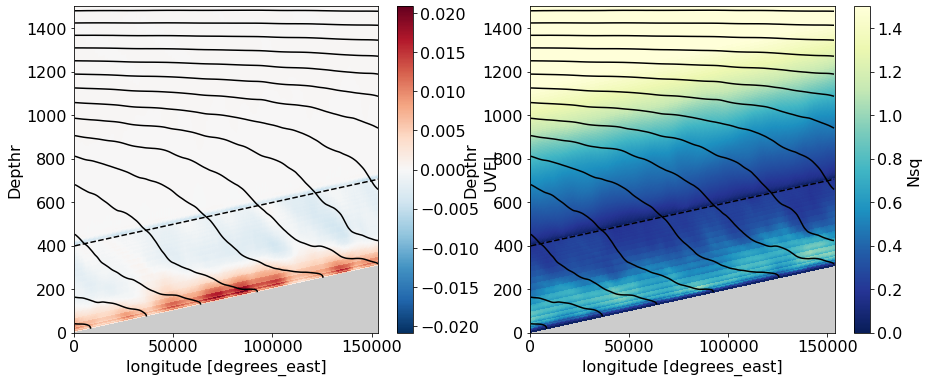

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=slice(-5, None, 1)).mean(dim=['YC', 'time'], skipna=True).plot(x='Xr_U', y='Zr_U')
ds['THETA_BG'].isel(time=slice(-5, None, 1), YC=128).mean(dim=['time'], skipna=True).plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0., 2.5, 0.05))
plt.ylim([0, 1500])
(-coords['Depthr'].isel(YC=0) + coords['Depthr'].isel(YC=128, XC=0)).plot(color="k",linestyle="--")

plt.subplot(1,2,2, facecolor=(.8, .8, .8))
ds['Nsq'] = ds['Nsq'].where(ds['Nsq'] != 0.)
#q = (ds['Nsq']*1e6).isel(time=slice(-5, None, 1), YC=128).mean(dim=['time'], skipna=True).plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q = (ds['Nsq']*1e6).isel(time=slice(-5, None, 1)).mean(dim=['YC', 'time'], skipna=True).plot(x='Xr_W', y='Zr_W', cmap='YlGnBu_r')
q.set_clim([0., 1.5])
ds['THETA_BG'].isel(time=slice(-5, None, 1), YC=128).mean(dim=['time'], skipna=True).plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0., 2.5, 0.05))
plt.ylim([0, 1500])
(-coords['Depthr'].isel(YC=0) + coords['Depthr'].isel(YC=128, XC=0)).plot(color="k",linestyle="--")

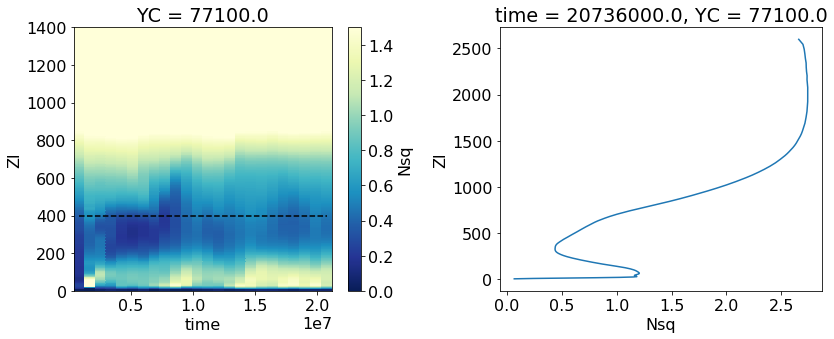

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
q = (ds['Nsq']*1.5e6).mean(dim='XC').isel(YC=128).plot(x='time', y='Zl', cmap='YlGnBu_r')
q.set_clim([0, 1.5])
plt.ylim([0,1400])
ridge_crest = ((-coords['Depth'].isel(YC=0, XC=0) + coords['Depth'].isel(YC=128, XC=0)))
plt.plot(ds['time'].values, ridge_crest.values*np.ones_like(ds['time'].values), "k--")

plt.subplot(1,2,2)
(ds['Nsq']*1.5e6).isel(YC=128, time=-1).mean(dim=['XC']).plot(y='Zl')
plt.tight_layout()

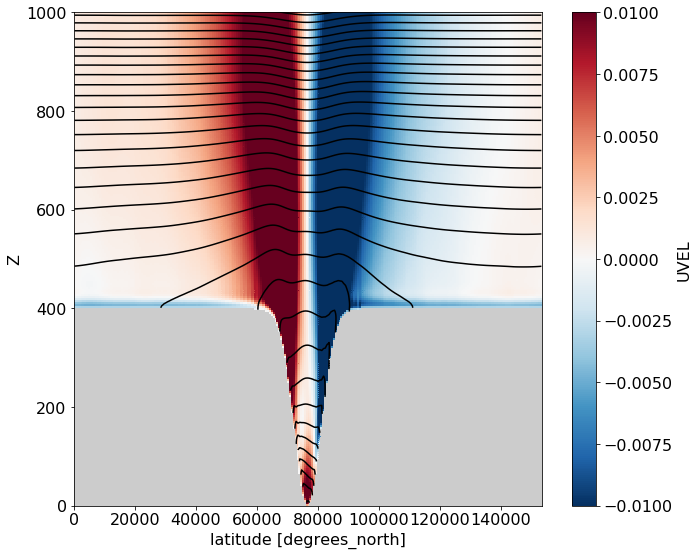

In [12]:
plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
q = ds['UVEL'].mean(dim='XG').isel(time=slice(-5,None,1)).mean(dim='time').plot()
q.set_clim([-1.e-2,1.e-2])
ds['THETA_BG'].mean(dim='XC').isel(time=slice(-5, None, 1)).mean(dim='time', skipna=True).plot.contour(colors='black', levels=np.arange(0., 2.5, 0.01))

plt.ylim([0, 1000])
plt.tight_layout()

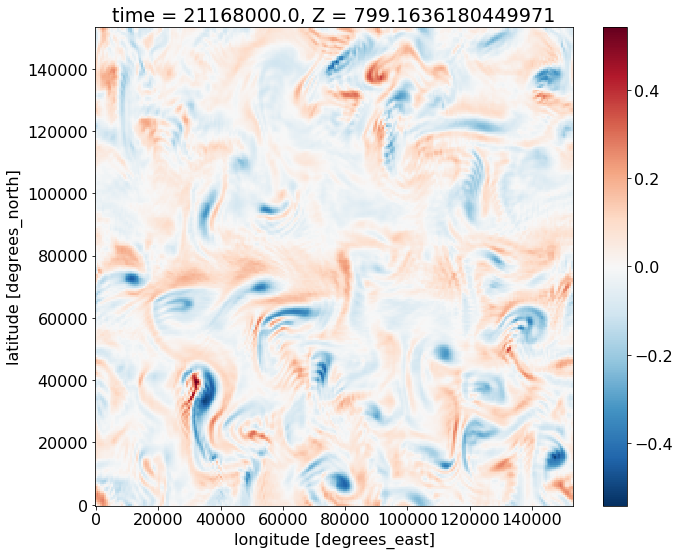

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
(ζ_snap/f).sel(Z=800, method='nearest').isel(time=-1).plot()

plt.tight_layout()

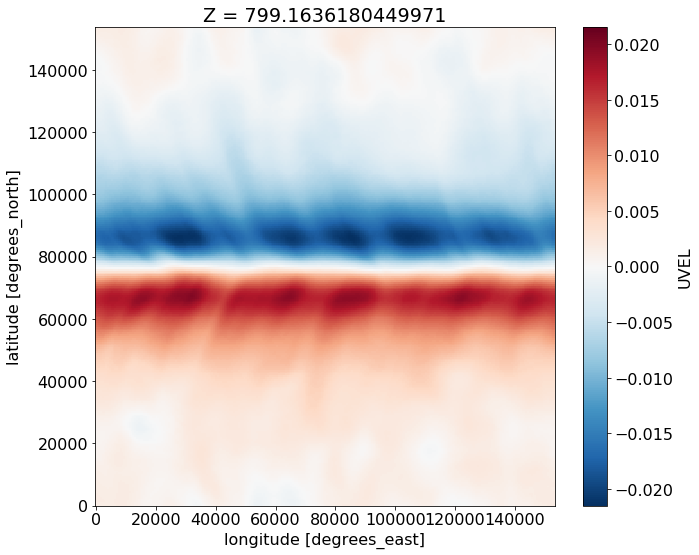

In [14]:
plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
(ds['UVEL']).sel(Z=800, method='nearest').isel(time=slice(-5,None,1)).mean(dim='time').plot()

plt.tight_layout()

### Energetics

In [17]:
ds['KE'] = grid.interp(ds['UVEL'], 'X')**2 + grid.interp(ds['VVEL'],'Y')**2

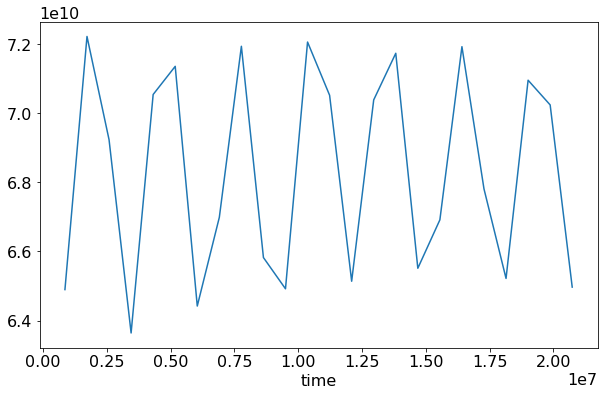

In [18]:
(ds['KE'] * coords['drC'] * coords['rA']).sum(dim=['Z', 'XC', 'YC'], skipna=True).plot()

### Spectral analysis

In [159]:
uhat2 = xrft.power_spectrum(grid.interp(up,'X').chunk({'time':1, 'YC':-1, 'XC':-1}),
                         dim=['XC','YC'], detrend='linear', window=True).compute()
vhat2 = xrft.power_spectrum(grid.interp(vp,'Y').chunk({'time':1, 'YC':-1, 'XC':-1}),
                         dim=['XC','YC'], detrend='linear', window=True).compute()

ekehat = .5*(uhat2 + vhat2)
ekehat;

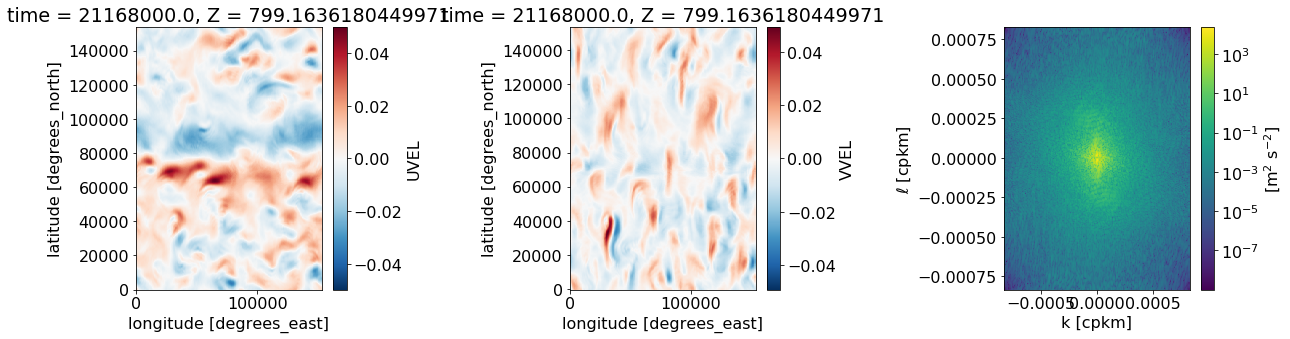

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
fig.set_tight_layout(True)
up.isel(time=-1).plot(ax=axes[0])
vp.isel(time=-1).plot(ax=axes[1])
im = axes[2].pcolormesh(ekehat.freq_XC, ekehat.freq_YC, ekehat.isel(time=-1),
                       norm=colors.LogNorm())
cbar = fig.colorbar(im, ax=axes[2])
cbar.set_label(r'[m$^2$ s$^{-2}$]')
axes[2].set_xlabel(r'k [cpkm]')
axes[2].set_ylabel(r'$\ell$ [cpkm]');

plt.tight_layout()

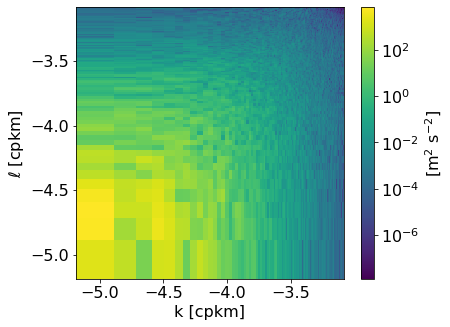

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
nx = ekehat.freq_XC.size
ny = ekehat.freq_YC.size
im = ax.pcolormesh(np.log10(ekehat.freq_XC.isel(freq_XC=slice(nx//2+1,nx))),
                   np.log10(ekehat.freq_YC.isel(freq_YC=slice(ny//2+1,ny))),
                        ekehat.isel(time=-1).isel(freq_XC=slice(nx//2+1,nx), freq_YC=slice(ny//2+1,ny)),
                       norm=colors.LogNorm())
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'[m$^2$ s$^{-2}$]')
ax.set_xlabel(r'k [cpkm]')
ax.set_ylabel(r'$\ell$ [cpkm]');

### Energy budget

\begin{equation}
K_{t} = \langle \overline{u'b'} \sin{\theta} + \overline{w'b'}\cos{\theta} \rangle - \langle \overline{u}_{z} \overline{u'w'} + \overline{v}_{z} \overline{v'w'} \rangle -
\langle v (\overline{u'^{2}_{z}} + \overline{v'^{2}_{z}} ) \rangle + \langle \overline{u'\mathcal{D}u'} + \overline{v'\mathcal{D}v'} \rangle
\end{equation}

Note: $\overline{\mathbf{u}'b'} = \overline{\mathbf{u}b} - \overline{\mathbf{u}}\overline{b}$ terms can be diagnosed from the `*VELTH` (or `ADV*_TH`) diagnostics; $u'w'$ and $v'w'$ terms diagnosed from `WU_VEL` and `WV_VEL`.

Note: We need to output kinetic energy dissipation due to viscosity and hyperviscosity online in the MITgcm.

In [ ]:
ds